In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
import numpy as np
import pandas as pd

In [0]:
test = pd.read_csv('/content/drive/My Drive/TS/data1/full/test.csv')
item = pd.read_csv('/content/drive/My Drive/TS/data1/full/items.csv')
store = pd.read_csv('/content/drive/My Drive/TS/data1/full/stores.csv')
oil = pd.read_csv('/content/drive/My Drive/TS/data1/full/oil.csv')
trans = pd.read_csv('/content/drive/My Drive/TS/data1/full/transactions.csv')
holiday = pd.read_csv('/content/drive/My Drive/TS/data1/full/holidays_events.csv')

In [0]:
types = {'onpromotion':object}
train = pd.read_csv('/content/drive/My Drive/TS/data1/full/train.csv', dtype=types )

In [0]:
train.head(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


In [0]:
test.head(10)

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
5,125497045,2017-08-16,1,105574,False
6,125497046,2017-08-16,1,105575,False
7,125497047,2017-08-16,1,105576,False
8,125497048,2017-08-16,1,105577,False
9,125497049,2017-08-16,1,105693,False


In [0]:
import pandas as pd
train_sub = pd.read_csv('/content/drive/My Drive/TS/train_store_fam.csv')
train_sub.head(10)

,Unnamed: 0,date,store_nbr,family,family_nbr,tot_sales,city,state,type,cluster,store_char,cluster_nbr
0,1,2013-01-01,25,BEAUTY,fam03,2.000,Salinas,Santa Elena,D,1,st25,c01
1,2,2013-01-01,25,BEVERAGES,fam04,810.000,Salinas,Santa Elena,D,1,st25,c01
2,3,2013-01-01,25,BREAD/BAKERY,fam06,180.589,Salinas,Santa Elena,D,1,st25,c01
3,4,2013-01-01,25,CLEANING,fam08,186.000,Salinas,Santa Elena,D,1,st25,c01
4,5,2013-01-01,25,DAIRY,fam09,143.000,Salinas,Santa Elena,D,1,st25,c01
5,6,2013-01-01,25,DELI,fam10,71.090,Salinas,Santa Elena,D,1,st25,c01
6,7,2013-01-01,25,EGGS,fam11,46.000,Salinas,Santa Elena,D,1,st25,c01
7,8,2013-01-01,25,FROZEN FOODS,fam12,29.655,Salinas,Santa Elena,D,1,st25,c01
8,9,2013-01-01,25,GROCERY I,fam13,700.000,Salinas,Santa Elena,D,1,st25,c01
9,10,2013-01-01,25,GROCERY II,fam14,15.000,Salinas,Santa Elena,D,1,st25,c01


In [0]:
print(train_sub.shape)

(2061903, 12)


In [0]:
# Top 10 highest sale families
t1=train_sub[['family','family_nbr','tot_sales']]
t1_gb=t1.groupby(['family'],as_index=False).sum()
t1_gb.sort_values(by=['tot_sales'],ascending=False).head(10)

,family,tot_sales
12,GROCERY I,3.434617e+08
3,BEVERAGES,2.169422e+08
30,PRODUCE,1.227047e+08
7,CLEANING,9.751840e+07
8,DAIRY,6.448726e+07
5,BREAD/BAKERY,4.213395e+07
28,POULTRY,3.187600e+07
24,MEATS,3.108647e+07
25,PERSONAL CARE,2.458094e+07
9,DELI,2.411032e+07


In [0]:
# Top 10 highest beverages sales stores
t2=train_sub[['store_nbr','family','family_nbr','tot_sales','city','state']]
t2_ft=t2.loc[t2['family'] == 'BEVERAGES']
t2_gb=t2_ft.groupby(['store_nbr','family'],as_index=False).sum()
t2_gb.sort_values(by=['tot_sales'],ascending=False).head(10)

,store_nbr,family,tot_sales
43,44,BEVERAGES,13417859.0
44,45,BEVERAGES,11370352.0
2,3,BEVERAGES,11351589.0
46,47,BEVERAGES,10788853.0
48,49,BEVERAGES,9221286.0
45,46,BEVERAGES,7861600.0
50,51,BEVERAGES,6872756.0
7,8,BEVERAGES,6347150.0
47,48,BEVERAGES,6313863.0
10,11,BEVERAGES,6139303.0


In [0]:
# Daily beverage sales of top selling store (store_nbr 44)
t3=train_sub[['store_nbr','family','family_nbr','date','tot_sales','city','state']]
t3_ft=t3.loc[(t3['family'] == 'BEVERAGES') & (t3['store_nbr'] == 44)]
t3_ft.head(10)

,store_nbr,family,family_nbr,date,tot_sales,city,state
709,44,BEVERAGES,fam04,2013-01-02,5466.0,Quito,Pichincha
1563,44,BEVERAGES,fam04,2013-01-03,3718.0,Quito,Pichincha
2418,44,BEVERAGES,fam04,2013-01-04,4112.0,Quito,Pichincha
3292,44,BEVERAGES,fam04,2013-01-05,6458.0,Quito,Pichincha
4133,44,BEVERAGES,fam04,2013-01-06,7939.0,Quito,Pichincha
4974,44,BEVERAGES,fam04,2013-01-07,4373.0,Quito,Pichincha
5831,44,BEVERAGES,fam04,2013-01-08,3703.0,Quito,Pichincha
6683,44,BEVERAGES,fam04,2013-01-09,4112.0,Quito,Pichincha
7544,44,BEVERAGES,fam04,2013-01-10,3411.0,Quito,Pichincha
8393,44,BEVERAGES,fam04,2013-01-11,4276.0,Quito,Pichincha


<Figure size 1920x1440 with 0 Axes>

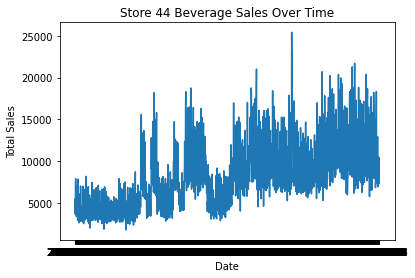

<Figure size 1920x1440 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
from pylab import *
plt.plot(t3_ft['date'],t3_ft['tot_sales'])
xlabel('Date')
ylabel('Total Sales')
title('Store 44 Beverage Sales Over Time')

In [0]:
t3_ft.index = pd.to_datetime(t3_ft['date'],format='%Y-%m-%d')
#t3_gb2=t3_ft.groupby(by=[t3_ft.index.month,t3_ft.index.year])
#t3_gb2
type(t3_ft['date'])

pandas.core.series.Series